In [41]:
%matplotlib notebook

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('../../data_files/final.csv')

In [3]:
df.columns

Index(['Released', 'Title', 'Source', 'Production Budget',
       'Opening Weekend Revenue', 'Domestic Box Office',
       'Infl. Adj. Dom. Box Office', 'International Box Office',
       'Worldwide Box Office', 'ratings', 'awards', 'rated', 'runtime',
       'genere', 'metascore', 'imdbRating', 'imdbVotes', 'imdbID',
       'nominations', 'trailer ids', 'max viewcount',
       'Infl. Adj. Production Budget', 'Infl. Adj. International Box Office',
       'Infl. Adj. Worldwide Box Office', 'Infl. Adj. Opening Weekend Revenue',
       'Genre', 'release_year', 'release_month'],
      dtype='object')

In [4]:
df = df.dropna(subset=['metascore', 'imdbRating'])

In [5]:
rev_by_mon = df.groupby('release_month')

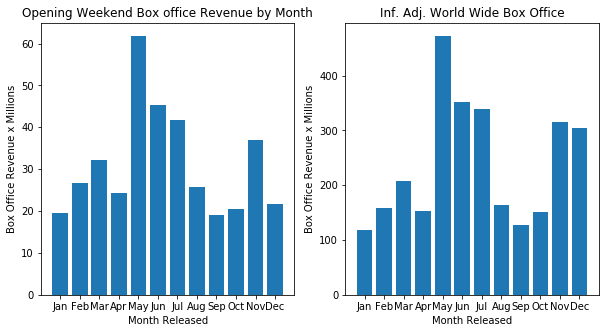

In [6]:
ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data = rev_by_mon['Infl. Adj. Opening Weekend Revenue'].mean().sort_index() / 1000000
rev = rev_by_mon['Infl. Adj. Worldwide Box Office'].mean().sort_index() / 1000000

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.bar(data.index, data)
plt.title('Opening Weekend Box office Revenue by Month')
plt.xticks(data.index, labels=ticks)
plt.xlabel('Month Released')
plt.ylabel('Box Office Revenue x Millions')

plt.subplot(122)
plt.bar(rev.index, rev)
plt.title('Inf. Adj. World Wide Box Office')
plt.xticks(data.index, labels=ticks)
plt.xlabel('Month Released')
plt.ylabel('Box Office Revenue x Millions')
plt.show()

In [7]:
ratings_df = df[['metascore', 'imdbRating', 'imdbVotes','Infl. Adj. Worldwide Box Office']]

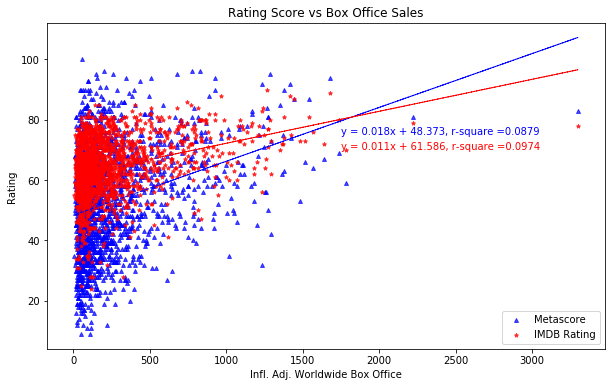

In [8]:
x_ratings = ratings_df['Infl. Adj. Worldwide Box Office'] / 1000000
y_meta = ratings_df['metascore']
y_imdb = ratings_df['imdbRating'] * 10

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)

m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(
    x_ratings, y_meta)
m_fit = m_slope * x_ratings + m_int

i_slope, i_int, i_r, i_p, i_std_err = stats.linregress(
    x_ratings, y_imdb)
i_fit = i_slope * x_ratings + i_int

ax1.scatter(x_ratings, y_meta, s=15, c='b', alpha=.7, marker="^", label='Metascore')
ax1.scatter(x_ratings, y_imdb, s=15, c='r', alpha=.7, marker="*", label='IMDB Rating')

plt.plot(x_ratings, m_fit, "b--", linewidth=1)
plt.annotate('y = {0:.3f}x + {1:.3f}, r-square ={2:.4f}'.format(m_slope, m_int, m_r ** 2), (1750,75), color='b')
plt.plot(x_ratings, i_fit, "r--", linewidth=1)
plt.annotate('y = {0:.3f}x + {1:.3f}, r-square ={2:.4f}'.format(i_slope, i_int, i_r ** 2), (1750,70), color='r')

plt.legend(loc='lower right')
plt.ylabel('Rating')
plt.xlabel('Infl. Adj. Worldwide Box Office')
plt.title('Rating Score vs Box Office Sales')
plt.show()
# print(line_plot(x_ratings, y_meta))
# print(line_plot_two(x_ratings, y_imdb))